In [2]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

In [3]:
# Example of TP0:
if __name__ == "__main__":
    factory = PokemonFactory("pokemon.json")
    snorlax = factory.create("snorlax", 100, StatusEffect.NONE, 1)
    print("No noise: ", attempt_catch(snorlax, "heavyball"))
    for _ in range(10):
        print("Noisy: ", attempt_catch(snorlax, "heavyball", 0.15))

No noise:  (False, 0.0846)
Noisy:  (False, 0.06368353579371311)
Noisy:  (False, 0.04917521982135981)
Noisy:  (False, 0.0908097497177084)
Noisy:  (False, 0.0757183431420072)
Noisy:  (False, 0.09018427828195476)
Noisy:  (False, 0.08764406202574795)
Noisy:  (False, 0.08106515015746092)
Noisy:  (False, 0.08855011441292229)
Noisy:  (False, 0.07472896020254698)
Noisy:  (False, 0.06281171109199685)


      Pokemon  Capture_result  Capture_Rate   Pokeball
0     snorlax           False        0.0326   pokeball
1     snorlax           False        0.0326   pokeball
2     snorlax           False        0.0326   pokeball
3     snorlax           False        0.0326   pokeball
4     snorlax           False        0.0326   pokeball
...       ...             ...           ...        ...
1995     onix           False        0.0846  heavyball
1996     onix           False        0.0846  heavyball
1997     onix           False        0.0846  heavyball
1998     onix           False        0.0846  heavyball
1999     onix            True        0.0846  heavyball

[2000 rows x 4 columns]


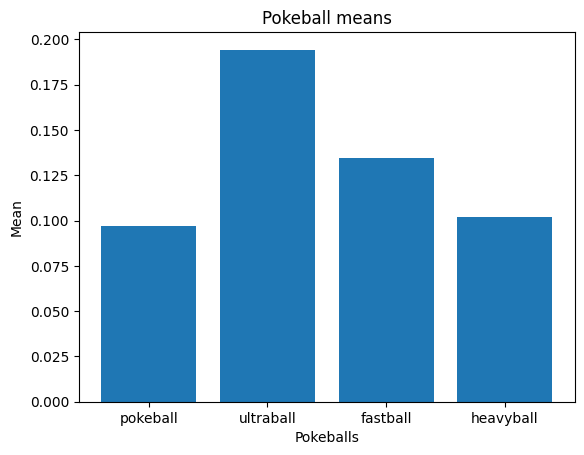

In [5]:
# Ejercicio 1 - Acerca de las Pokebolas, Inciso a):
from numpy import matrix, insert, append
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statistics

factory = PokemonFactory("pokemon.json")                                                    # Call Pokemon configuration function.
Pokedex = ["snorlax", "jolteon", "caterpie", "mewtwo", "onix"]                              # Registered Pokemons in configuration list.
Pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]                              # Registered Pokeballs.
Data = pd.DataFrame(columns = [])                                                           # Defining empty Data frame of variables.

for Pokeball in Pokeballs:
    for PokemonName in Pokedex:
        Pokemon = factory.create(PokemonName, 100, StatusEffect.NONE, 1)            # Creates a Pokemon with: Level = 100, Status_effect = None, and HP = 1.
        for _ in range(100):
            Catch, CaptureRate = attempt_catch(Pokemon,Pokeball)                    # Pokemon catching attempts (taking probability).
            AttemptData = {
                "Pokemon": PokemonName,
                "Capture_result": Catch,
                "Capture_Rate": CaptureRate,
                "Pokeball": Pokeball
            }
            Data = pd.concat([Data, pd.DataFrame([AttemptData])], ignore_index = True)
#---------------------------------------------------------------------------------------
print(Data)
Mean_pokeball = statistics.mean(Data[Data["Pokeball"].isin(["pokeball"])]["Capture_Rate"])
Mean_ultraball = statistics.mean(Data[Data["Pokeball"].isin(["ultraball"])]["Capture_Rate"])
Mean_fastball = statistics.mean(Data[Data["Pokeball"].isin(["fastball"])]["Capture_Rate"])
Mean_heavyball = statistics.mean(Data[Data["Pokeball"].isin(["heavyball"])]["Capture_Rate"])
POKE_Means = [Mean_pokeball, Mean_ultraball, Mean_fastball, Mean_heavyball]
#---------------------------------------------------------------------------------------
plt.bar(Pokeballs, POKE_Means)
plt.xlabel('Pokeballs')
plt.ylabel('Mean')
plt.title('Pokeball means')
plt.show()

     Pokemon   Pokeball  Effectivity
0    snorlax   pokeball         0.02
1    jolteon   pokeball         0.05
2   caterpie   pokeball         0.31
3     mewtwo   pokeball         0.00
4       onix   pokeball         0.06
5    snorlax  ultraball         0.03
6    jolteon  ultraball         0.12
7   caterpie  ultraball         0.70
8     mewtwo  ultraball         0.01
9       onix  ultraball         0.08
10   snorlax   fastball         0.01
11   jolteon   fastball         0.20
12  caterpie   fastball         0.41
13    mewtwo   fastball         0.03
14      onix   fastball         0.03
15   snorlax  heavyball         0.09
16   jolteon  heavyball         0.02
17  caterpie  heavyball         0.31
18    mewtwo  heavyball         0.00
19      onix  heavyball         0.05


C:\Users\mbaquero\AppData\Local\Temp\ipykernel_1408\2819001204.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(Pokedex, rotation=45)


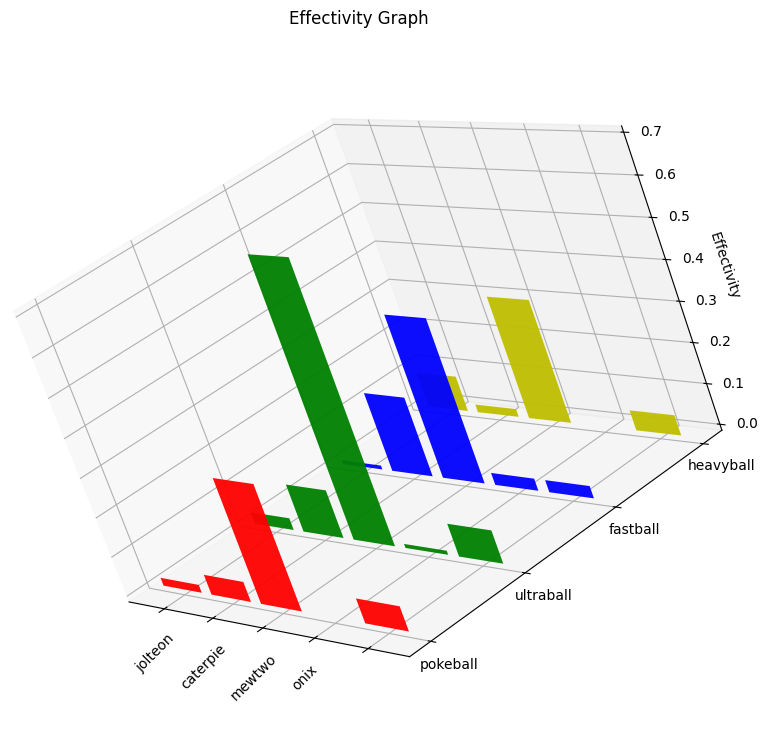

In [6]:
# Ejercicio 1 - Acerca de las Pokebolas, Inciso b):

EfData = pd.DataFrame(columns = [])                                                           # Defining empty Data frame of variables.
# Taking neccessary data and computing effectivity:
for Pokeball in Pokeballs:
    Catch_pokeball = Data[Data["Pokeball"].isin([Pokeball])]
    for PokemonName in Pokedex:
        Pokemon_Pokeball = Catch_pokeball[Catch_pokeball["Pokemon"].isin([PokemonName])]["Capture_result"]
        Effectivity_Pokemon_vs_Pokeball = len(Pokemon_Pokeball[Pokemon_Pokeball.isin([True])])/len(Pokemon_Pokeball)
        EffectivityData = {
            "Pokemon": PokemonName,
            "Pokeball": Pokeball,
            "Effectivity": Effectivity_Pokemon_vs_Pokeball,
        }
        EfData = pd.concat([EfData, pd.DataFrame([EffectivityData])], ignore_index = True)

print(EfData)

yticks = []
fig = plt.figure(figsize=(9, 9.2))
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
for i,Pokeball in enumerate(Pokeballs):
    yticks.append(len(Pokeballs) - len(Pokeballs) + i)

for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = []
    ys = []
    for i,PokemonName in enumerate(Pokedex):
        xs.append(len(Pokedex) - len(Pokedex) + i + 1)
    ys = EfData[EfData["Pokeball"].isin([Pokeballs[k]])]["Effectivity"]
    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c]*len(xs)
    #cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.95)

#ax.set_xlabel('Pokemons')
#ax.set_ylabel('Pokeballs')
ax.set_zlabel('Effectivity', labelpad=1)

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
# Configurar etiquetas de los ejes
ax.set_xticklabels(Pokedex, rotation=45)
ax.set_yticklabels(Pokeballs)

ax.set_title('Effectivity Graph')

ax.view_init(elev=20, azim=-35, roll=20)

plt.show()